## MeanImageFilter

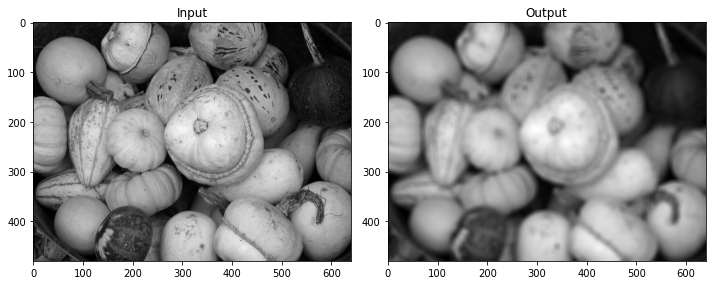

In [15]:
import itk
from itkwidgets import view
import matplotlib.pyplot as plt

file_name = "Gourds.png"
image = itk.imread(file_name)

output = itk.MeanImageFilter(image, Radius=5)
# view(output)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image,cmap="gray")
axes[0].set_title('Input')
axes[1].imshow(output,cmap="gray")
axes[1].set_title('Output')

plt.tight_layout()
plt.show()

## BinaryThresholdImageFilter

In [17]:
import itk
from itkwidgets import view

file_name = "cthead1.png"
image1 = itk.imread(file_name)
print(image1.shape)

# viewer =  view(image1, gradient_opacity=0.5)
# viewer.cmap = ['Grayscale',]
# viewer

(256, 256)


(0, 0)


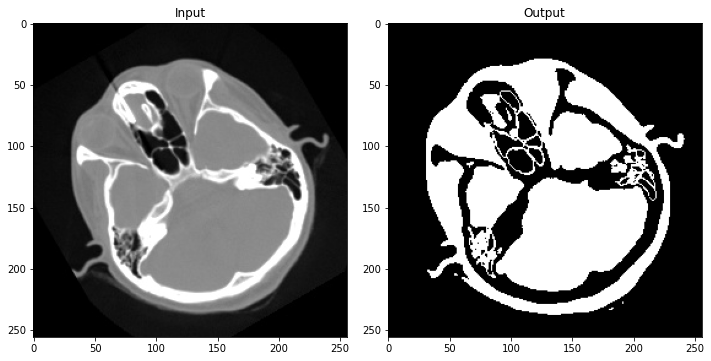

In [18]:

# Load the input image
input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)

InputIm = reader.GetOutput()

print(InputIm.shape)

# Create the BinaryThresholdImageFilter
BinaryThresholdImageFilterType = itk.BinaryThresholdImageFilter[ImageType, ImageType]
binary_threshold_filter = BinaryThresholdImageFilterType.New()
binary_threshold_filter.SetInput(InputIm)

# Set the threshold values
lower_threshold = 50
upper_threshold = 150
inside_value = 255
outside_value = 0
binary_threshold_filter.SetLowerThreshold(lower_threshold)
binary_threshold_filter.SetUpperThreshold(upper_threshold)
binary_threshold_filter.SetInsideValue(inside_value)
binary_threshold_filter.SetOutsideValue(outside_value)

# Update the filter
binary_threshold_filter.Update()


img = binary_threshold_filter.GetOutput()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(InputIm,cmap="gray")
axes[0].set_title('Input')
axes[1].imshow(img,cmap="gray")
axes[1].set_title('Output')

plt.tight_layout()
plt.show()


## CannyEdgeDetectionImageFilter

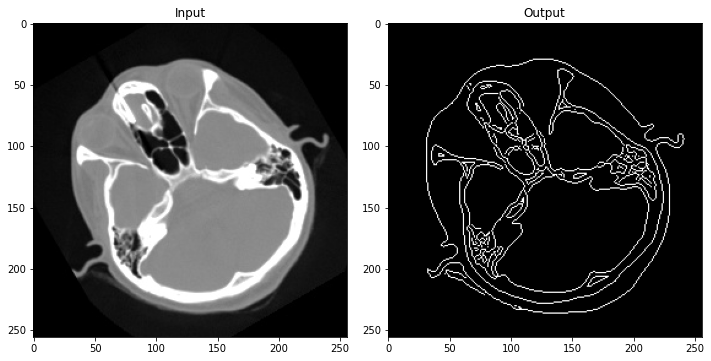

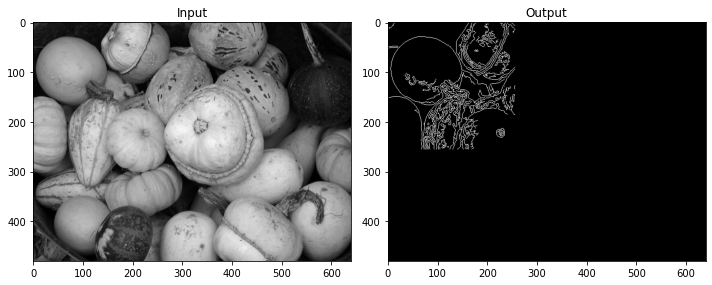

In [52]:
import itk
from itkwidgets import view

input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2
lower_threshold = 1.0
upper_threshold = 10.0
variance  = 1.0

reader.SetFileName(input_image_path)

ImageType = itk.Image[PixelType, Dimension]
reader = itk.ImageFileReader[ImageType].New()
reader.SetFileName(input_image_path)
inputIm = reader.GetOutput()

# print(inputIm.shape)

cannyFilter = itk.CannyEdgeDetectionImageFilter[ImageType, ImageType].New()
cannyFilter.SetInput(inputIm)
cannyFilter.SetVariance(variance)
cannyFilter.SetLowerThreshold(lower_threshold)
cannyFilter.SetUpperThreshold(upper_threshold)


cannyOut = cannyFilter.GetOutput() 
# print(cannyOut.shape)

rescaler = itk.RescaleIntensityImageFilter[ImageType, ImageType].New()
rescaler.SetInput(cannyOut)
rescaler.SetOutputMinimum(0)
rescaler.SetOutputMaximum(255)

rescaler.Update()

img = rescaler.GetOutput()

# print(img.shape)

# viewer =  view(img, gradient_opacity=0.5)
# viewer.cmap = ['Grayscale',]
# viewer

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(inputIm,cmap="gray")
axes[0].set_title('Input')
axes[1].imshow(img,cmap="gray")
axes[1].set_title('Output')

plt.tight_layout()
plt.show()


input_image_path = "Gourds.png"
reader.SetFileName(input_image_path)
rescaler.Update()
img = rescaler.GetOutput()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(inputIm,cmap="gray")
axes[0].set_title('Input')
axes[1].imshow(img,cmap="gray")
axes[1].set_title('Output')

plt.tight_layout()
plt.show()


## Threaded Filter Execution 

In [46]:
from IPython.display import display, Markdown
display(Markdown('![image](aaaa.jpg)'))

![image](aaaa.jpg)

https://github.com/InsightSoftwareConsortium/ITK/blob/master/Wrapping/Generators/Python/itk/support/extras.py

In [36]:
# help(itk.MultiThreaderBase)
itk.set_nthreads(4)

In [37]:
itk.get_nthreads()

4

## Composite Filter

In [54]:
display(Markdown('![image](d2.jpg)'))
display(Markdown('![image](d1.jpg)'))

![image](d2.jpg)

![image](d1.jpg)

In [12]:
import itk
from itkwidgets import view
import numpy as np
import matplotlib.pyplot as plt

input_image_path = "cthead1.png"
PixelType = itk.ctype('float')
Dimension = 2

InputPixelType = itk.F
OutputPixelType = itk.UC

InputImageType = itk.Image[InputPixelType, Dimension]
OutputImageType = itk.Image[OutputPixelType, Dimension]

reader = itk.ImageFileReader[InputImageType].New()
reader.SetFileName(input_image_path)

inputIm = reader.GetOutput()

castImageFilter = itk.CastImageFilter[InputImageType, OutputImageType].New()
castImageFilter.SetInput(inputIm)
castImageFilter.Update()

# print(img.shape)
InputIm = castImageFilter.GetOutput()


def my_func():
    my_pipeline=itk.pipeline()
    MedianFilter=itk.MeanImageFilter.IUC2IUC2.New()
    my_pipeline.connect(MedianFilter)
    my_pipeline.expose("Radius")
    thresholdFilter=itk.ThresholdImageFilter.IUC2.New()
    my_pipeline.connect(thresholdFilter)
    my_pipeline.expose("Lower")
    return my_pipeline

my_pipeline = my_func()
my_pipeline.SetInput(InputIm)
my_pipeline.SetRadius(5)
my_pipeline.SetLower(100)
my_pipeline.Update()
out=my_pipeline.GetOutput()



viewer =  view(out, gradient_opacity=0.5)
viewer.cmap = ['Grayscale',]
viewer


Viewer(cmap=['Grayscale'], geometries=[], gradient_opacity=0.5, point_sets=[], rendered_image=<itk.itkImagePyt…

In [56]:
my_pipeline=itk.pipeline()
help(my_pipeline)

Help on pipeline in module itk.support.extras object:

class pipeline(builtins.object)
 |  pipeline(*args, **kargs) -> None
 |  
 |  A convenient class to store the reference to the filters of a pipeline
 |  
 |  With this class, a method can create a pipeline of several filters and
 |  return it without losing the references to the filters in this pipeline.
 |  The pipeline object act almost like a filter (it has a GetOutput() method)
 |  and thus can be simply integrated in another pipeline.
 |  
 |  Methods defined here:
 |  
 |  GetInput(self)
 |      Get the input of the pipeline
 |  
 |  GetNumberOfOutputs(self) -> int
 |      Return the number of outputs
 |  
 |  GetOutput(self, l_index: int = 0)
 |      Return the output of the pipeline
 |      
 |      If another output is needed, use
 |      pipeline.filters[-1].GetAnotherOutput() instead of this method,
 |      subclass pipeline to implement another GetOutput() method, or use
 |      expose()
 |  
 |  SetInput(self, l_input)